In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.Dropout(0.2),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Dropout(0.2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Dropout(0.2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 289s 183ms/step - accuracy: 0.2486 - loss: 1.9551 - val_accuracy: 0.4526 - val_loss: 1.4996
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 321s 182ms/step - accuracy: 0.4826 - loss: 1.4199 - val_accuracy: 0.5215 - val_loss: 1.3341
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 321s 182ms/step - accuracy: 0.5551 - loss: 1.2267 - val_accuracy: 0.5963 - val_loss: 1.1568
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 323s 182ms/step - accuracy: 0.5992 - loss: 1.1238 - val_accuracy: 0.6121 - val_loss: 1.1017
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 285s 183ms/step - accuracy: 0.6266 - loss: 1.0474 - val_accuracy: 0.6426 - val_loss: 1.0165
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 322s 183ms/step - accuracy: 0.6454 - loss: 1.0013 - val_accuracy: 0.6644 - val_loss: 0.9507
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 286s 183ms/step - accuracy: 0.6653 - loss: 0.9429 - val_accuracy: 0.6729 - val_loss: 0.9409
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 320s 182ms/step - ac

In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.6963 - loss: 0.8751
Test accuracy: 0.6934999823570251


In [6]:
predictions = model.predict(test_images[:4])
predicted_labels = tf.argmax(predictions, axis=1)

for i in range(4):
    print(f'Predicted: {predicted_labels[i].numpy()}, Actual: {test_labels[i]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
Predicted: 3, Actual: [3]
Predicted: 8, Actual: [8]
Predicted: 8, Actual: [8]
Predicted: 0, Actual: [0]


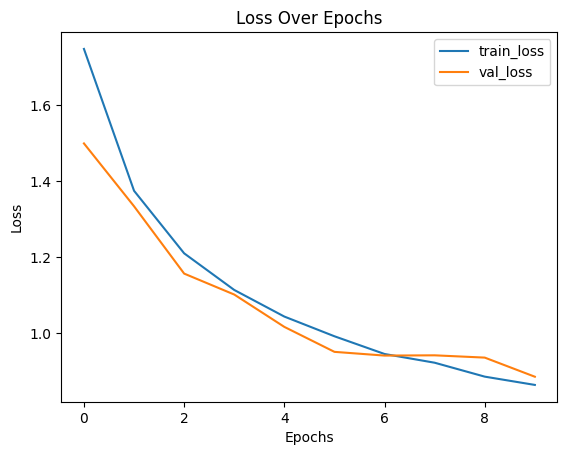

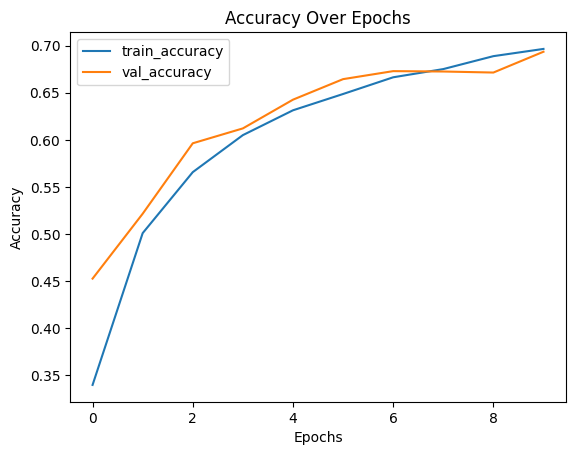

In [7]:
import matplotlib.pyplot as plt

# Plotting loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
